In [6]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
normal_files='D:\deepthi\train\NORMAL'

print(normal_files[0:5])
print(normal_files[-5:])

['NORMAL2-IM-0771-0001.jpeg', 'NORMAL2-IM-1294-0001-0002.jpeg', 'IM-0675-0001.jpeg', 'NORMAL2-IM-1169-0001.jpeg', 'IM-0421-0001.jpeg']
['NORMAL2-IM-1160-0001.jpeg', 'NORMAL2-IM-0389-0001.jpeg', 'IM-0162-0001.jpeg', 'NORMAL2-IM-1247-0001.jpeg', 'IM-0219-0001.jpeg']


In [11]:
Pneumonia_files='D:\deepthi\train\PNEUMONIA'

print(Pneumonia_files[0:5])
print(Pneumonia_files[-5:])

['person1180_virus_2010.jpeg', 'person1230_virus_2081.jpeg', 'person1513_virus_2632.jpeg', 'person124_virus_238.jpeg', 'person746_virus_1369.jpeg']
['person1541_virus_2681.jpeg', 'person799_virus_1431.jpeg', 'person931_virus_1592.jpeg', 'person861_virus_1506.jpeg', 'person1051_bacteria_2985.jpeg']


In [12]:
print('Normal: ', len(normal_files))
print('Pneumonia: ',len(Pneumonia_files))

Normal:  1341
Pneumonia:  3875


In [13]:
Normal_label=[0]*1341
Pneumonia_label=[1]*3875

In [14]:
print('Normal labels: ',len(Normal_label))
print('Pneumonia labels: ',len(Pneumonia_label))

Normal labels:  1341
Pneumonia labels:  3875


In [17]:
print('With Normal labels: ', Normal_label[0:5])
print('Without Pneumonia labels: ', Pneumonia_label[0:5])

With Normal labels:  [0, 0, 0, 0, 0]
Without Pneumonia labels:  [1, 1, 1, 1, 1]


In [18]:
labels=Normal_label + Pneumonia_label

print('Labels are: ',len(labels))

print(labels[0:5])
print(labels[-5:])

Labels are:  5216
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [16]:
type(labels)

list

### Normal image

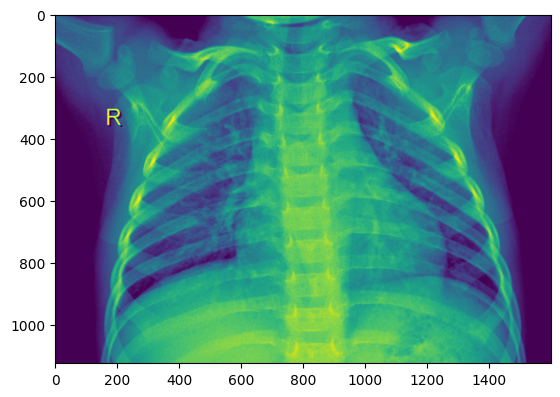

In [21]:
image=mpimg.imread('D:\deepthi\train\NORMAL\IM-0125-0001.jpeg')
plt.imshow(image)

plt.show()

### Pneumonia image

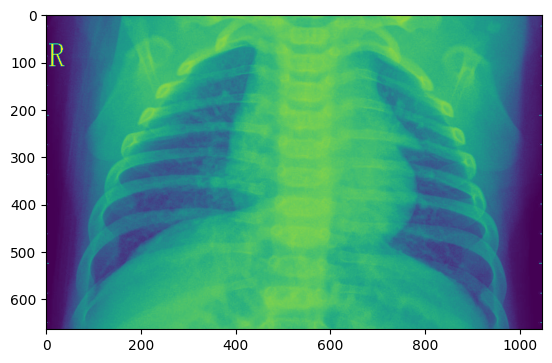

In [22]:
image=mpimg.imread('D:\deepthi\train\PNEUMONIA\person1007_virus_1690.jpeg')
plt.imshow(image)

plt.show()

### Image Processing

In [24]:
normal_path=('D:\deepthi\train\NORMAL')
data=[]

for img_file in normal_files:
    image=Image.open(normal_path +img_file)
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)
    
Pneumonia_path=('D:\deepthi\train\PNEUMONIA')

for img_file in Pneumonia_files:
    image=Image.open(Pneumonia_path + img_file )
    image=image.resize((128,128))
    image=image.convert('RGB')
    image=np.array(image)
    data.append(image)

In [25]:
type(data)

list

In [26]:
len(data)

5216

In [27]:
data[0]

array([[[41, 41, 41],
        [49, 49, 49],
        [43, 43, 43],
        ...,
        [ 7,  7,  7],
        [ 5,  5,  5],
        [ 0,  0,  0]],

       [[44, 44, 44],
        [49, 49, 49],
        [43, 43, 43],
        ...,
        [14, 14, 14],
        [16, 16, 16],
        [ 2,  2,  2]],

       [[49, 49, 49],
        [46, 46, 46],
        [41, 41, 41],
        ...,
        [31, 31, 31],
        [23, 23, 23],
        [ 2,  2,  2]],

       ...,

       [[35, 35, 35],
        [42, 42, 42],
        [47, 47, 47],
        ...,
        [37, 37, 37],
        [38, 38, 38],
        [37, 37, 37]],

       [[35, 35, 35],
        [40, 40, 40],
        [43, 43, 43],
        ...,
        [37, 37, 37],
        [38, 38, 38],
        [36, 36, 36]],

       [[39, 39, 39],
        [37, 37, 37],
        [38, 38, 38],
        ...,
        [40, 40, 40],
        [38, 38, 38],
        [41, 41, 41]]], dtype=uint8)

In [28]:
type(data[0])

numpy.ndarray

In [30]:
data[0].shape

(128, 128, 3)

In [31]:
X=np.array(data)
Y=np.array(labels)

In [32]:
type(X)

numpy.ndarray

In [34]:
type(Y)

numpy.ndarray

In [35]:
print(X.shape)
print(Y.shape)

(5216, 128, 128, 3)
(5216,)


### Train Test Split

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(5216, 128, 128, 3) (4172, 128, 128, 3) (1044, 128, 128, 3)


In [38]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [39]:
X_train[0]

array([[[35, 35, 35],
        [32, 32, 32],
        [30, 30, 30],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[53, 53, 53],
        [49, 49, 49],
        [46, 46, 46],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[57, 57, 57],
        [57, 57, 57],
        [55, 55, 55],
        ...,
        [ 1,  1,  1],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

In [40]:
X_train_scaled[0]

array([[[0.1372549 , 0.1372549 , 0.1372549 ],
        [0.1254902 , 0.1254902 , 0.1254902 ],
        [0.11764706, 0.11764706, 0.11764706],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.20784314, 0.20784314, 0.20784314],
        [0.19215686, 0.19215686, 0.19215686],
        [0.18039216, 0.18039216, 0.18039216],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.22352941, 0.22352941, 0.22352941],
        [0.22352941, 0.22352941, 0.22352941],
        [0.21568627, 0.21568627, 0.21568627],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

### Model Training

In [42]:
import tensorflow as tf
from tensorflow import keras

In [47]:
num_of_classes=2

model=keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3),activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [48]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['acc']
)

In [53]:
history=model.fit(X_train_scaled,Y_train, validation_split=0.1, verbose=1, epochs=5)

Epoch 1/5
118/118 [==============================] - 2s 19ms/step - loss: 0.1317 - acc: 0.9595 - val_loss: 0.1109 - val_acc: 0.9569
Epoch 2/5
118/118 [==============================] - 2s 16ms/step - loss: 0.1330 - acc: 0.9584 - val_loss: 0.1036 - val_acc: 0.9593
Epoch 3/5
118/118 [==============================] - 2s 16ms/step - loss: 0.1257 - acc: 0.9587 - val_loss: 0.0943 - val_acc: 0.9617
Epoch 4/5
118/118 [==============================] - 2s 16ms/step - loss: 0.1142 - acc: 0.9646 - val_loss: 0.0999 - val_acc: 0.9545
Epoch 5/5
118/118 [==============================] - 2s 16ms/step - loss: 0.0818 - acc: 0.9755 - val_loss: 0.0767 - val_acc: 0.9689


Accuracy

In [54]:
loss,accuracy=model.evaluate(X_test_scaled, Y_test)

33/33 [==============================] - 0s 7ms/step - loss: 0.1179 - acc: 0.9598


Accuracy is 95.98%

### Visualization

#### Loss

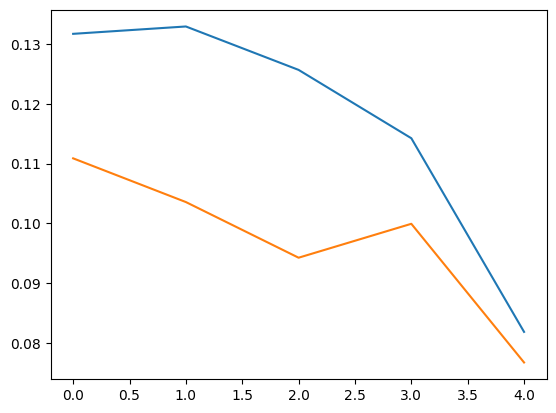

In [57]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')

#### Accuracy

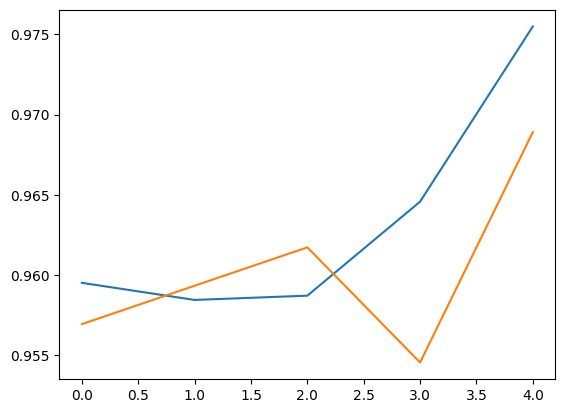

In [56]:
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='validation accuracy')

In [58]:
y_pred=model.predict(X_test)

33/33 [==============================] - 0s 4ms/step


In [63]:
np.argmax(y_pred[589])

1

In [64]:
Y_test[589]

1